<a href="https://colab.research.google.com/github/BattleCruiserRRR/ADSP_31014_Final_Project/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction and Context

In [ ]:
# Framework link for reference:
framework_link = "https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix"
print(f"For more information about the CycleGAN and pix2pix implementation, visit: {framework_link}")



For more information about the CycleGAN and pix2pix implementation, visit: https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix


# Check for GPU avilability


In [ ]:
import tensorflow as tf

# Check GPU details
device_name = tf.test.gpu_device_name()
if device_name:
    print(f"GPU detected: {device_name}")
else:
    print("No GPU found. Please enable GPU runtime in Colab settings.")

!nvidia-smi


GPU detected: /device:GPU:0
Mon Nov 17 02:01:45 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   63C    P0             29W /   70W |     102MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-------------------

# Installing the CycleGAN and Pix2Pix Framework

In [ ]:
# Install the PyTorch CycleGAN and Pix2Pix framework from GitHub.
# This setup will allow us to utilize predefined models and data loaders specific to CycleGAN.
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix.git
%cd pytorch-CycleGAN-and-pix2pix

Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2619, done.
remote: Total 2619 (delta 0), reused 0 (delta 0), pack-reused 2619 (from 1)
Receiving objects: 100% (2619/2619), 8.24 MiB | 38.33 MiB/s, done.
Resolving deltas: 100% (1654/1654), done.
/content/pytorch-CycleGAN-and-pix2pix


In [ ]:
!ls

CycleGAN.ipynb	docs		 LICENSE  pix2pix.ipynb  test.py
data		environment.yml  models   README.md	 train.py
datasets	imgs		 options  scripts	 util


In [ ]:
!cat environment.yml

name: pytorch-img2img
channels:
  - pytorch
  - conda-forge
  - nvidia
dependencies:
  - python=3.11
  - pytorch=2.4.0
  - torchvision=0.19.0
  - pytorch-cuda=12.1
  - numpy=1.24.3
  - scikit-image
  - pip
  - pip:
      - dominate>=2.8.0
      - Pillow>=10.0.0
      - wandb>=0.16.0


In [ ]:
import yaml

# Load environment.yml
with open("environment.yml", "r") as f:
    env = yaml.safe_load(f)

pip_packages = env.get("dependencies", [])[-1].get("pip", [])

print("Pip packages found:", pip_packages)

# Install them
for pkg in pip_packages:
    !pip install {pkg}

Pip packages found: ['dominate>=2.8.0', 'Pillow>=10.0.0', 'wandb>=0.16.0']


# Downloading the Cityscapes Dataset

In [ ]:
!ls

'=0.16.0'	  data		    imgs      pix2pix.ipynb   train.py
'=10.0.0'	  datasets	    LICENSE   README.md       util
'=2.8.0'	  docs		    models    scripts
 CycleGAN.ipynb   environment.yml   options   test.py


In [ ]:
!bash ./datasets/download_cyclegan_dataset.sh vangogh2photo

流式输出内容被截断，只能显示最后 5000 行内容。
  inflating: ./datasets/vangogh2photo/trainB/2016-08-26 19:25:29.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-02-20 16:54:25.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-05-19 19:43:44.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-10-26 21:18:58.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-07-19 15:39:53.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-06-13 21:21:54.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-06-04 14:10:33.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-06-18 12:46:34.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-03-17 18:07:22.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-01-24 17:24:29.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-01-27 12:45:41.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-06-14 05:57:28.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-12-24 01:48:36.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-

# Visualizing Unpaired Data Examples

In [ ]:
!ls ./datasets/vangogh2photo/

testA  testB  trainA  trainB


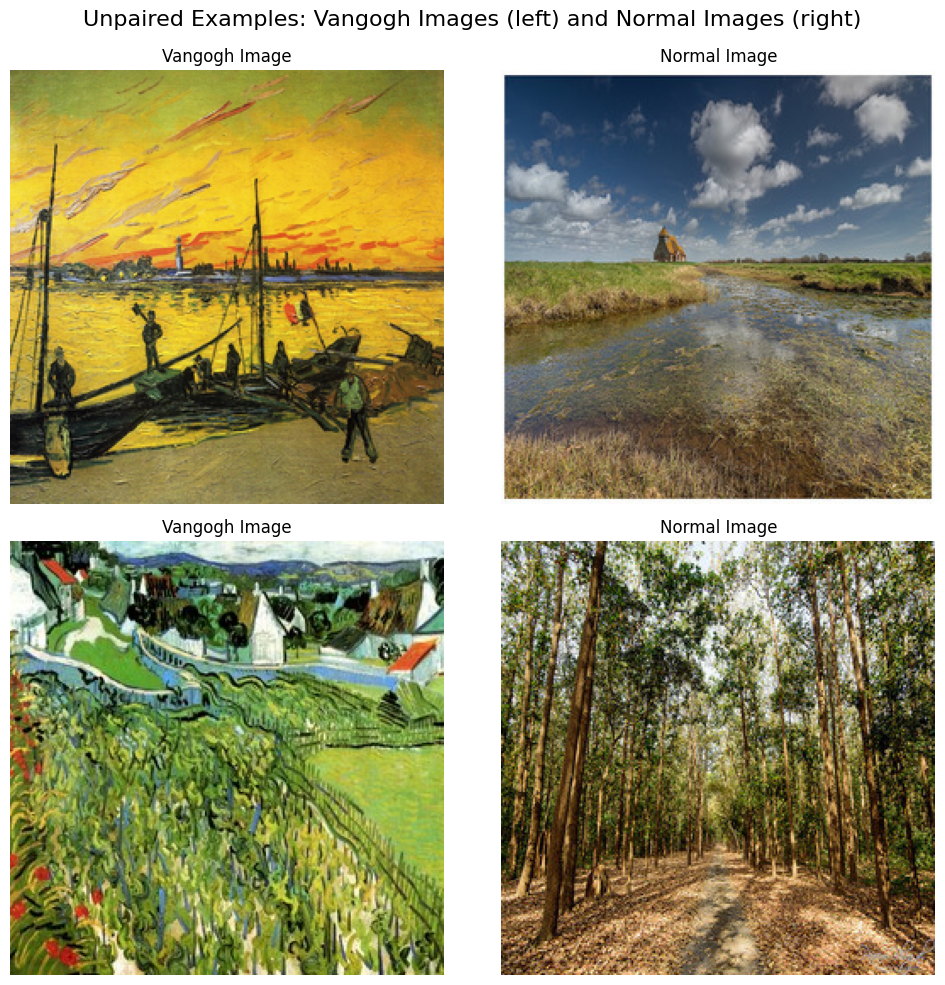

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import random

trainA_path = './datasets/vangogh2photo/trainA'
trainB_path = './datasets/vangogh2photo/trainB'

# Function to load and display random examples of unpaired data
def visualize_unpaired_data(num_examples=3):
    # Get random file names from trainA and trainB directories
    trainA_files = random.sample(os.listdir(trainA_path), num_examples)
    trainB_files = random.sample(os.listdir(trainB_path), num_examples)

    # Set up a subplot grid for visualization
    fig, axes = plt.subplots(num_examples, 2, figsize=(10, 5 * num_examples))
    fig.suptitle("Unpaired Examples: Vangogh Images (left) and Normal Images (right)", fontsize=16)

    for i in range(num_examples):
        # Load and display a random summer image from trainA
        imgA = Image.open(os.path.join(trainA_path, trainA_files[i]))
        axes[i, 0].imshow(imgA)
        axes[i, 0].axis('off')
        axes[i, 0].set_title("Vangogh Image")

        # Load and display a random winter image from trainB
        imgB = Image.open(os.path.join(trainB_path, trainB_files[i]))
        axes[i, 1].imshow(imgB)
        axes[i, 1].axis('off')
        axes[i, 1].set_title("Normal Image")

    plt.tight_layout()
    plt.subplots_adjust(top=0.92)
    plt.show()

# Call the function to visualize 3 unpaired examples from the dataset
visualize_unpaired_data(num_examples=2)

# Basic Analytics on the Unpaired Dataset

In [ ]:
import numpy as np

# Function to calculate and display basic analytics on the unpaired dataset
def dataset_analytics(data_path_A, data_path_B):
    # Count the number of images in each domain (summer and winter)
    num_images_A = len(os.listdir(data_path_A))
    num_images_B = len(os.listdir(data_path_B))

    # Lists to store dimensions of images in each domain
    dimensions_A = []
    dimensions_B = []

    # Get dimensions for a sample of images in Domain A (Summer) and Domain B (Winter)
    for img_file in os.listdir(data_path_A):
        img = Image.open(os.path.join(data_path_A, img_file))
        dimensions_A.append(img.size)

    for img_file in os.listdir(data_path_B):
        img = Image.open(os.path.join(data_path_B, img_file))
        dimensions_B.append(img.size)

    # Convert dimensions to numpy arrays for calculations
    dimensions_A = np.array(dimensions_A)
    dimensions_B = np.array(dimensions_B)

    # Calculate average dimensions
    avg_width_A, avg_height_A = dimensions_A.mean(axis=0)
    avg_width_B, avg_height_B = dimensions_B.mean(axis=0)

    # Display analytics
    print(f"Dataset Analytics for Vangogh")
    print(f"------------------------------------------")
    print(f"Total images in Vangogh (trainA): {num_images_A}")
    print(f"Total images in Normal (trainB): {num_images_B}")
    print(f"Average dimensions for Vangogh images: {avg_width_A:.2f} x {avg_height_A:.2f}")
    print(f"Average dimensions for Normal images: {avg_width_B:.2f} x {avg_height_B:.2f}")
    print(f"Image dimensions range for Vangogh images: {dimensions_A.min(axis=0)} to {dimensions_A.max(axis=0)}")
    print(f"Image dimensions range for Normal images: {dimensions_B.min(axis=0)} to {dimensions_B.max(axis=0)}")

# Run analytics on the dataset
dataset_analytics(trainA_path, trainB_path)

Dataset Analytics for Vangogh
------------------------------------------
Total images in Vangogh (trainA): 400
Total images in Normal (trainB): 6287
Average dimensions for Vangogh images: 256.00 x 256.00
Average dimensions for Normal images: 256.00 x 256.00
Image dimensions range for Vangogh images: [256 256] to [256 256]
Image dimensions range for Normal images: [256 256] to [256 256]


#Balancing the Dataset Across Domains

In [ ]:
import shutil
from pathlib import Path

# Define new folder paths for balanced dataset
balanced_data_path = Path('./datasets/vangogh2photo_balanced')
trainA_balanced_path = balanced_data_path / 'trainA'
trainB_balanced_path = balanced_data_path / 'trainB'

# Create directories if they don't exist
trainA_balanced_path.mkdir(parents=True, exist_ok=True)
trainB_balanced_path.mkdir(parents=True, exist_ok=True)

def balance_data(source_path, dest_path, num_samples=500):
    # Get a random sample of file names from the source directory
    sampled_files = random.sample(os.listdir(source_path), num_samples)

    # Copy sampled files to the destination directory
    for file_name in sampled_files:
        source_file = os.path.join(source_path, file_name)
        dest_file = os.path.join(dest_path, file_name)
        shutil.copy(source_file, dest_file)

# Balance the data by copying 500 images from each domain to the new directories
balance_data(trainA_path, trainA_balanced_path, num_samples=400)
balance_data(trainB_path, trainB_balanced_path, num_samples=400)

print("Balanced dataset created with 400 images in each domain (Vangogh and Normal).")
print(f"Balanced data is stored in {balanced_data_path}")

Balanced dataset created with 400 images in each domain (Vangogh and Normal).
Balanced data is stored in datasets/vangogh2photo_balanced


# Training CycleGAN on the Balanced Summer2Winter Dataset

In [ ]:
# Training CycleGAN from Scratch:
# We’ll train CycleGAN from scratch on the summer2winter_yosemite dataset to learn the mapping between unpaired summer and winter images.

# Steps for Training CycleGAN:
# Step 1: Pass a Summer image through G -> generates Winter-style image
# Step 2: Pass generated Winter image through F -> reconstructs Summer image
# Step 3: Pass a Winter image through F -> generates Summer-style image
# Step 4: Pass generated Summer image through G -> reconstructs Winter image
# Step 5: DA and DB distinguish real vs. generated images in both domains to improve realism

# Training Command:
!python train.py --dataroot ./datasets/vangogh2photo_balanced \
                 --name vangogh2photo \
                 --model cycle_gan \
                 --n_epochs 30 \
                 --n_epochs_decay 30 \
                 --batch_size 4
# Explanation:
# - `--dataroot`: Specifies the dataset path.
# - `--name`: Sets the experiment name (useful for organizing logs and models).
# - `--model`: Specifies the 'cycle_gan' model.
# - `--display_id -1`: Disables intermediate display (useful in Colab).

# Running this command will start CycleGAN training from scratch on the balanced summer2winter dataset.


----------------- Options ---------------
               batch_size: 4                             	[default: 1]
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                 dataroot: ./datasets/vangogh2photo_balanced	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
             display_freq: 400                           
          display_winsize: 256                           
                    epoch: latest                        
              epoch_count: 1                             
                 gan_mode: lsgan                         
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                            

In [ ]:
log_path = "./checkpoints/vangogh2photo/loss_log.txt"

with open(log_path, "r") as f:
    lines = f.readlines()

lines[:15]

['================ Training Loss (Mon Nov 17 02:10:24 2025) ================\n',
 '[Rank 0] (epoch: 1, iters: 100, time: 0.574, data: 0.208) , D_A: 0.575, G_A: 0.602, cycle_A: 3.843, idt_A: 1.429, D_B: 0.806, G_B: 0.860, cycle_B: 2.978, idt_B: 1.879\n',
 '\n',
 '[Rank 0] (epoch: 1, iters: 200, time: 0.583, data: 0.003) , D_A: 0.398, G_A: 0.394, cycle_A: 3.243, idt_A: 1.290, D_B: 0.813, G_B: 1.019, cycle_B: 2.661, idt_B: 1.680\n',
 '\n',
 '[Rank 0] (epoch: 1, iters: 300, time: 0.578, data: 0.003) , D_A: 0.279, G_A: 0.348, cycle_A: 3.092, idt_A: 1.181, D_B: 0.296, G_B: 0.435, cycle_B: 2.585, idt_B: 1.394\n',
 '\n',
 '[Rank 0] (epoch: 1, iters: 400, time: 0.612, data: 0.003) , D_A: 0.291, G_A: 0.338, cycle_A: 2.901, idt_A: 1.347, D_B: 0.349, G_B: 0.287, cycle_B: 2.877, idt_B: 1.302\n',
 '\n',
 '[Rank 0] (epoch: 2, iters: 100, time: 0.579, data: 0.223) , D_A: 0.265, G_A: 0.377, cycle_A: 2.946, idt_A: 1.157, D_B: 0.255, G_B: 0.371, cycle_B: 2.686, idt_B: 1.351\n',
 '\n',
 '[Rank 0] (epoch: 

In [ ]:
import matplotlib.pyplot as plt
import re

# Loss containers
steps = []
D_A_losses = []
G_A_losses = []
cycle_A_losses = []
idt_A_losses = []

D_B_losses = []
G_B_losses = []
cycle_B_losses = []
idt_B_losses = []

step_count = 0

for line in lines:
    if "D_A:" in line:   # each valid training line
        step_count += 1
        steps.append(step_count)

        # Extract all losses one-by-one
        d_a = re.findall(r"D_A: ([0-9.]+)", line)
        g_a = re.findall(r"G_A: ([0-9.]+)", line)
        cyc_a = re.findall(r"cycle_A: ([0-9.]+)", line)
        idt_a = re.findall(r"idt_A: ([0-9.]+)", line)

        d_b = re.findall(r"D_B: ([0-9.]+)", line)
        g_b = re.findall(r"G_B: ([0-9.]+)", line)
        cyc_b = re.findall(r"cycle_B: ([0-9.]+)", line)
        idt_b = re.findall(r"idt_B: ([0-9.]+)", line)

        # Append losses
        D_A_losses.append(float(d_a[0]))
        G_A_losses.append(float(g_a[0]))
        cycle_A_losses.append(float(cyc_a[0]))
        idt_A_losses.append(float(idt_a[0]))

        D_B_losses.append(float(d_b[0]))
        G_B_losses.append(float(g_b[0]))
        cycle_B_losses.append(float(cyc_b[0]))
        idt_B_losses.append(float(idt_b[0]))

print("Parsed", step_count, "training steps")

Parsed 240 training steps


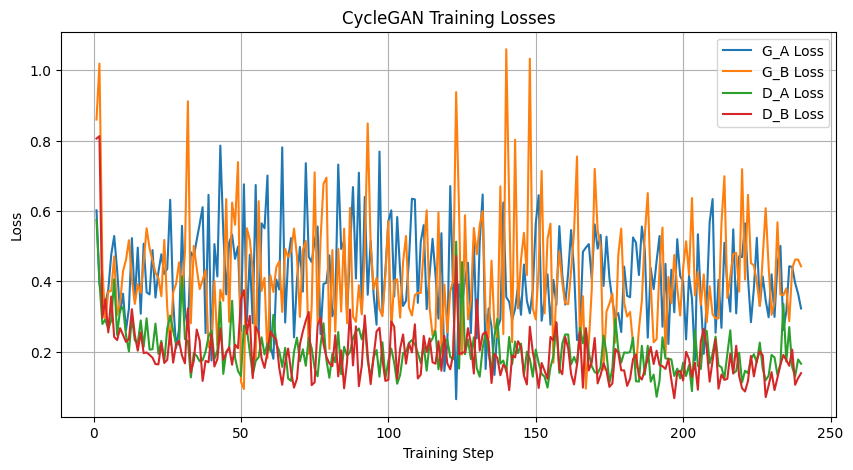

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(steps, G_A_losses, label="G_A Loss")
plt.plot(steps, G_B_losses, label="G_B Loss")
plt.plot(steps, D_A_losses, label="D_A Loss")
plt.plot(steps, D_B_losses, label="D_B Loss")

plt.xlabel("Training Step")
plt.ylabel("Loss")
plt.title("CycleGAN Training Losses")
plt.legend()
plt.grid()
plt.show()

# Training Log Legend

In [ ]:
# (epoch: X, iters: Y, time: Z, data: W)
# - **epoch**: Current epoch number
# - **iters**: Current iteration within the epoch
# - **time**: Processing time per iteration (seconds)
# - **data**: Data loading time per iteration (seconds)

# D_A / D_B: Discriminator loss for Domain A / Domain B
# G_A / G_B: Generator loss for translating from Domain A to B (G_A) or B to A (G_B)
# cycle_A / cycle_B: Cycle-consistency loss ensuring image reconstruction (A -> B -> A and B -> A -> B)
# idt_A / idt_B: Identity loss for preserving features in images already in the target domain (A or B)

# Lower values generally indicate better performance and stability.




# Model testing  



In [ ]:
!mkdir -p ./datasets/vangogh2photo_balanced/testA
!mkdir -p ./datasets/vangogh2photo_balanced/testB

!cp ./datasets/vangogh2photo_balanced/trainA/* ./datasets/vangogh2photo_balanced/testA/
!cp ./datasets/vangogh2photo_balanced/trainB/* ./datasets/vangogh2photo_balanced/testB/

In [ ]:
# Model Testing:
# After training CycleGAN, we can test it to generate and view translated images between the two domains (e.g., summer to winter and vice versa).

# Command to Test the Model:
# This command runs the model on the test set, generating images that will be saved in the results directory.
!python test.py --dataroot ./datasets/vangogh2photo --name vangogh2photo --model cycle_gan --phase test

# Explanation of the Command:
# - `--dataroot`: Specifies the path to the dataset.
# - `--name`: Sets the experiment name (should match the name used during training).
# - `--model`: Specifies the model type as 'cycle_gan'.
# - `--phase test`: Runs the model in test mode, using images from the test set.

# Results:
# Generated images will be saved in a new directory under `./results/summer2winter_yosemite/test_latest`.
# This will include translated images for both directions (e.g., summer to winter and winter to summer).
# You can view these images to assess the quality of the model's translations.


----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: ./datasets/vangogh2photo      	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                             	[default: 0]
                load_size: 256             

# Visualize Real vs. Fake Image

In [ ]:
!ls

'=0.16.0'      CycleGAN.ipynb   environment.yml   options	  scripts
'=10.0.0'      data	        imgs		  pix2pix.ipynb   test.py
'=2.8.0'       datasets         LICENSE		  README.md	  train.py
 checkpoints   docs	        models		  results	  util


In [ ]:
!ls ./datasets/vangogh2photo/testB/ | wc -l

751


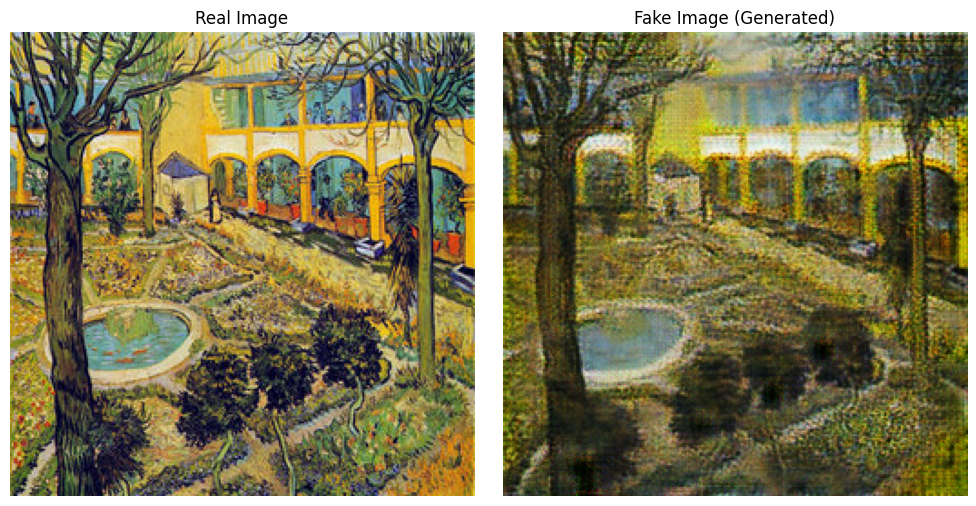

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

# Define paths to the real and fake images
real_image_path = "./results/vangogh2photo/test_latest/images/00001_real_A.png"
fake_image_path = "./results/vangogh2photo/test_latest/images/00001_fake_B.png"

# Load the images
real_image = Image.open(real_image_path)
fake_image = Image.open(fake_image_path)

# Plot the images side by side for comparison
plt.figure(figsize=(10, 5))

# Display real image
plt.subplot(1, 2, 1)
plt.imshow(real_image)
plt.title("Real Image")
plt.axis("off")

# Display fake (generated) image
plt.subplot(1, 2, 2)
plt.imshow(fake_image)
plt.title("Fake Image (Generated)")
plt.axis("off")

plt.tight_layout()
plt.show()

# This cell visualizes the real vs. fake image, allowing a quick comparison to assess the quality of the generated translation.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dest_path = '/content/drive/MyDrive/Uchicago/2025_FALL/ADSP_32014/Project'

In [ ]:
!mkdir -p /content/drive/MyDrive/Uchicago/2025_FALL/ADSP_32014/Project/vangogh2photo

In [ ]:
!cp -r ./checkpoints/vangogh2photo/* /content/drive/MyDrive/Uchicago/2025_FALL/ADSP_32014/Project/vangogh2photo

In [ ]:
!ls

'=0.16.0'      CycleGAN.ipynb   environment.yml   options	  scripts
'=10.0.0'      data	        imgs		  pix2pix.ipynb   test.py
'=2.8.0'       datasets         LICENSE		  README.md	  train.py
 checkpoints   docs	        models		  results	  util


# (Use thi part to test performance)Final Output: Build the gradio for testing performance

##### A being the van gogh paintings, B being the real pictures

G_A : A → B

G_B : B → A

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix.git
%cd pytorch-CycleGAN-and-pix2pix

Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2619, done.
remote: Total 2619 (delta 0), reused 0 (delta 0), pack-reused 2619 (from 1)
Receiving objects: 100% (2619/2619), 8.23 MiB | 13.69 MiB/s, done.
Resolving deltas: 100% (1654/1654), done.
/content/pytorch-CycleGAN-and-pix2pix


In [ ]:
import yaml

# Load environment.yml
with open("environment.yml", "r") as f:
    env = yaml.safe_load(f)

pip_packages = env.get("dependencies", [])[-1].get("pip", [])

print("Pip packages found:", pip_packages)

# Install them
for pkg in pip_packages:
    !pip install {pkg}

Pip packages found: ['dominate>=2.8.0', 'Pillow>=10.0.0', 'wandb>=0.16.0']


In [ ]:
import sys

sys.path.append("/content/pytorch-CycleGAN-and-pix2pix")
from models.networks import ResnetGenerator

In [ ]:
REPO_PATH  = "/content/pytorch-CycleGAN-and-pix2pix"
CHECKPOINT_DIR = "/content/drive/MyDrive/Project/vangogh2photo"


In [ ]:
# Change working directory to your repo
%cd $REPO_PATH

# Imports
import sys, torch, os
from PIL import Image
import numpy as np
from torchvision import transforms

# Add repo to python path
sys.path.append(REPO_PATH)
from models.networks import ResnetGenerator

# Device
device = "cuda" if torch.cuda.is_available() else "cpu"

def load_generator(checkpoint_path):
    print("Loading:", checkpoint_path)
    net = ResnetGenerator(
        input_nc=3,
        output_nc=3,
        ngf=64,
        norm_layer=torch.nn.InstanceNorm2d,
        use_dropout=False,
        n_blocks=9,
    ).to(device)
    net.load_state_dict(torch.load(checkpoint_path, map_location=device))
    net.eval()
    return net

/content/pytorch-CycleGAN-and-pix2pix


In [ ]:
# Official CycleGAN test transform
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(256),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5),
                         (0.5, 0.5, 0.5)),
])

# Un-normalization
def deprocess(tensor):
    img = tensor.detach().cpu().numpy()
    img = (img * 0.5 + 0.5)
    img = np.transpose(img, (1, 2, 0))
    img = (img * 255).astype(np.uint8)
    return Image.fromarray(img)

In [ ]:
def apply_tta(net, x):
    # normal forward
    y1 = net(x)

    # flip TTA (horizontal)
    x_flip = torch.flip(x, dims=[3])
    y2 = net(x_flip)
    y2 = torch.flip(y2, dims=[3])

    # average
    return (y1 + y2) / 2

In [ ]:
def style_transfer(img, checkpoint_name):
    # Convert input to RGB always
    img = img.convert("RGB")

    # Load the selected checkpoint dynamically
    ckpt_path = os.path.join(CHECKPOINT_DIR, checkpoint_name)
    netG = load_generator(ckpt_path)

    # Preprocess
    x = preprocess(img).unsqueeze(0).to(device)

    # Run with TTA
    with torch.no_grad():
        out = apply_tta(netG, x)[0]

    return deprocess(out)

In [ ]:
!pip install gradio --quiet
import gradio as gr

# List all pth models in the directory
checkpoints = [f for f in os.listdir(CHECKPOINT_DIR) if f.endswith(".pth")]
checkpoints.sort()

demo = gr.Interface(
    fn=style_transfer,
    inputs=[
        gr.Image(type="pil", label="Upload Image"),
        gr.Dropdown(checkpoints, label="Choose Checkpoint")
    ],
    outputs=gr.Image(type="pil", label="Stylized Output"),
    title="Refined CycleGAN Style Transfer",
    description="Using Correct Test Preprocessing + RGB Fix + TTA + Checkpoint Selector"
)

demo.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://e656fdd1949e5b3023.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
